In [67]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df_values4 = pd.read_csv("df_values4.csv")


In [68]:
#Normalize 
df4_scaled = StandardScaler().fit_transform(df_values4)
df_norm1 = pd.DataFrame(df4_scaled)#Transform numpy into a dataframe

x = df_norm1.iloc[:,1:13] 
y = df_norm1.iloc[:,14] #CFR

In [204]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_norm1, test_size=0.3, random_state=1)
x_train = train.iloc[:,1:13] 
x_test = test.iloc[:,1:13] 
y_train = train.iloc[:,14]
y_test = test.iloc[:,14]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((97, 12), (97,), (42, 12), (42,))

In [179]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.cross_decomposition import PLSRegression

LR = LinearRegression(normalize=True).fit(x_train, y_train)
PLS = PLSRegression(n_components=2).fit(x,y)

scoreL = []
scoreP = []

for i in range(2,20):
    scoresL = cross_val_score(LR, x, y, cv=i)
    scoresP = cross_val_score(PLS, x, y, cv=i)

    scoreL.append(scoresL.mean())
    scoreP.append(scoresP.mean())

max(scoreL), max(scoreP)

(0.4233705956975869, 0.4041586089689698)

In [223]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(random_state=0).fit(x,y)
RFR_R2 = RFR.score(x,y)
RFR_R2

0.936739043874488

In [209]:
y_test = pd.DataFrame(y_test)
y_test = y_test.reset_index()
y_test = y_test.drop('index', axis=1)
y_test = np.array(y_test)

In [220]:
#Determine further metrics
y_predL = LR.predict(x_test)
y_predP = PLS.predict(x_test)
y_predR = RFR.predict(x_test)

In [222]:
rmseL=np.sqrt(np.mean((y_test-y_predL)**2))
rmseP=np.sqrt(np.mean((y_test-y_predP)**2))
rmseR=np.sqrt(np.mean((y_test-y_predR)**2))

rmseL, rmseP, rmseR

(1.254052224786922, 0.6782931367292709, 1.153700126483958)

Text(0.7, -1.5, 'rmse =1.154')

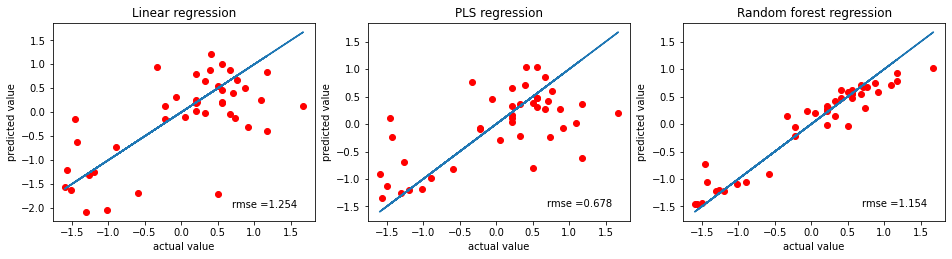

In [266]:
ax = plt.figure(figsize=(16,8))
ax1=plt.subplot(231)
ax1.scatter(y_test,y_predL,c='red')
ax1.set_title('Linear regression')
ax1.plot(y_test, y_test)
ax1.set_xlabel('actual value')
ax1.set_ylabel('predicted value')
ax1.text(0.7,-2.0, 'rmse ='+str(round(rmseL,3)))

ax2=plt.subplot(232)
ax2.scatter(y_test,y_predP,c='red')
ax2.plot(y_test, y_test)
ax2.set_title('PLS regression')
ax2.set_xlabel('actual value')
ax2.set_ylabel('predicted value')
ax2.text(0.7,-1.5, 'rmse ='+str(round(rmseP,3)))

ax3=plt.subplot(233)
ax3.scatter(y_test,y_predR,c='red')
ax3.plot(y_test, y_test)
ax3.set_title('Random forest regression')
ax3.set_xlabel('actual value')
ax3.set_ylabel('predicted value')
ax3.text(0.7,-1.5, 'rmse ='+str(round(rmseR,3)))